<a href="https://colab.research.google.com/github/Tanvir007/Deep-Learning-for-Sewage-Treatment-Plant/blob/main/DTP_05_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from CSV file
data = pd.read_csv('/content/drive/MyDrive/BUET Thesis/DSTP day month year.csv')

# Select features and target
selected_features = ['day', 'month', 'year','InQuantitySLSMLD','InpH', 'InCOD', 'InBOD', 'InAmmonia', 'InSS', 'InPhosphate', 'InFecalColiform','EfpH','EfCOD','EfBOD','EfAmmonia','EfSS','EfPhosphate','EfFecalColiform'	]

X = data[selected_features]
y = data['EfDischargetoGojariaMLD']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE, MAE, MAPE, and R2 for both the training and test sets
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, r2

train_rmse, train_mae, train_mape, train_r2 = calculate_metrics(y_train, y_train_pred)
test_rmse, test_mae, test_mape, test_r2 = calculate_metrics(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Train R2:", train_r2)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R2:", test_r2)


Train RMSE: 3.2655464300811494
Train MAE: 1.9976104712042175
Train MAPE: 0.5857588285747802
Train R2: 0.9956177359574344
Test RMSE: 8.42529880439947
Test MAE: 5.066843902439058
Test MAPE: 1.4186522937827442
Test R2: 0.9728835915151882


<ipython-input-7-6cab6ecc367c>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')


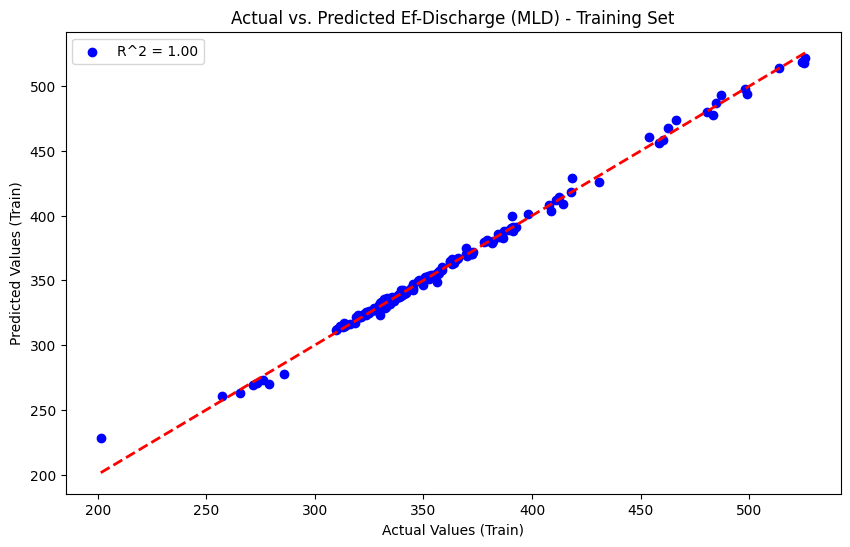

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R2 for the training set
r2_train = r2_score(y_train, y_train_pred)

# Scatter plot for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label=f"R^2 = {r2_train:.2f}", color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Actual vs. Predicted Ef-Discharge (MLD) - Training Set")
plt.legend()
plt.show()


<ipython-input-8-09311caaa76d>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


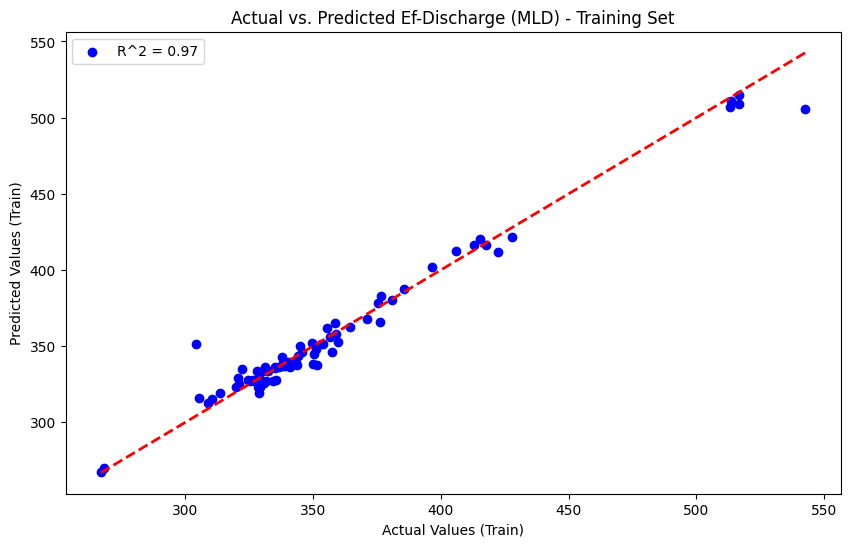

In [ ]:

# Calculate R2 for the testing set
r2_test = r2_score(y_test, y_test_pred)

# Scatter plot for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, label=f"R^2 = {r2_test:.2f}", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Actual vs. Predicted Ef-Discharge (MLD) - Training Set")
plt.legend()
plt.show()

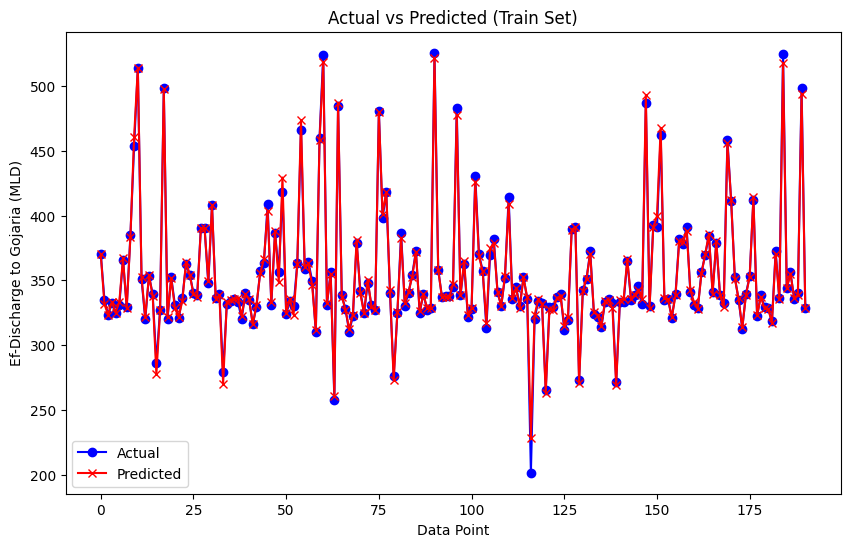

In [ ]:
# Line plot for actual and predicted values (Train Set)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label="Actual", marker='o', color='blue')
plt.plot(range(len(y_train_pred)), y_train_pred, label="Predicted", marker='x', color='red')
plt.xlabel("Data Point")
plt.ylabel("Ef-Discharge to Gojaria (MLD)")
plt.title("Actual vs Predicted (Train Set)")
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame with the features for the next 7 days
future_dates = pd.date_range(start="2023-06-24", periods=7)  # Assuming a date range starting from June 24, 2023

# You need to provide values for day, month, year, and other relevant features
# Here's an example, but you should replace the values with the actual data:
future_data = {
    "day": [25, 26, 27, 28, 29, 30, 1],  # Replace with the day of each future date
    "month": [6, 6, 6, 6, 6, 6, 7],    # Replace with the month of each future date
    "year": [2023, 2023, 2023, 2023, 2023, 2023, 2023],  # Replace with the year of each future date
    # Add values for other features as needed
    "InQuantitySLSMLD": [530,537,490,430,450,470,527],
    "InpH": [7.8,8.9,8.1,9.4,3.5,10.1,8.2],
    "InCOD":[280,291,310,425,411,510,297],
    "InBOD":[310,333,358,410,419,391,299],
    "InAmmonia":[29,24,27,26,31,35,29],
    "InSS":[150,170,159,139,145,151,131],
    "InPhosphate":[4,3,4,3.55,4.87,3.99,3.11],
    "InFecalColiform":[4600,3999,4001,4500,4870,5001,5500],
    "EfpH": [7.2,7.5,7.5,7.9,6.5,7.1,7.2],
    "EfCOD":[8,9,10,5,11,10,7],
    "EfBOD":[1.5,1.3,1.58,2.10,2.19,2.91,2.99],
    "EfAmmonia":[.29,.24,.27,.26,.31,.35,.29],
    "EfSS":[2,1,1,9,5,5.1,9],
    "EfPhosphate":[1.4,1.3,1.4,1.355,1.487,1.399,1.311],
    "EfFecalColiform":[46,39,40,45,48,50,55]

}

# Create the X_future DataFrame
X_future = pd.DataFrame(future_data)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # Assuming X is your training data

X_future = scaler.transform(X_future)

from sklearn.tree import DecisionTreeRegressor

# Create and train your Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predicted_values = model.predict(X_future)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
predicted_values

array([201.39, 201.39, 201.39, 201.39, 201.39, 201.39, 201.39])

In [ ]:
plt.savefig('scatter_plot.png')

<Figure size 640x480 with 0 Axes>